# PCA ggplot

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
from scientisttools import load_decathlon2
X = load_decathlon2()
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, SEBRLE to Drews
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   X100m         27 non-null     float64 
 1   Long.jump     27 non-null     float64 
 2   Shot.put      27 non-null     float64 
 3   High.jump     27 non-null     float64 
 4   X400m         27 non-null     float64 
 5   X110m.hurdle  27 non-null     float64 
 6   Discus        27 non-null     float64 
 7   Pole.vault    27 non-null     float64 
 8   Javeline      27 non-null     float64 
 9   X1500m        27 non-null     float64 
 10  Rank          27 non-null     int32   
 11  Points        27 non-null     int32   
 12  Competition   27 non-null     category
dtypes: category(1), float64(10), int32(2)
memory usage: 2.7+ KB


In [3]:
from scientisttools import PCA
res_pca = PCA(standardize=True,n_components=None,ind_sup=list(range(23,X.shape[0])),quanti_sup=[10,11],quali_sup=12,parallelize=True)
res_pca.fit(X)

PCA(ind_sup=[23, 24, 25, 26], n_components=None, parallelize=True, quali_sup=12,
    quanti_sup=[10, 11])

## Eigenvalues

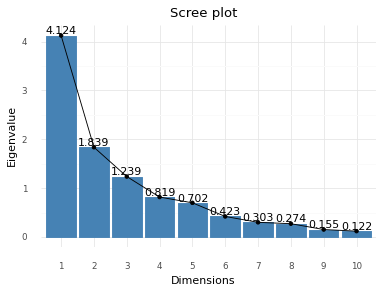

In [4]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(res_pca,choice="eigenvalue",add_labels=True)
print(p)

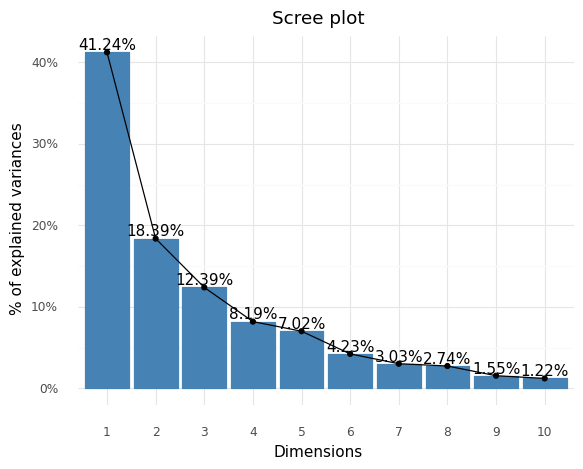

In [5]:
# Proportion
p = fviz_screeplot(res_pca,choice="proportion",add_labels=True)
print(p)

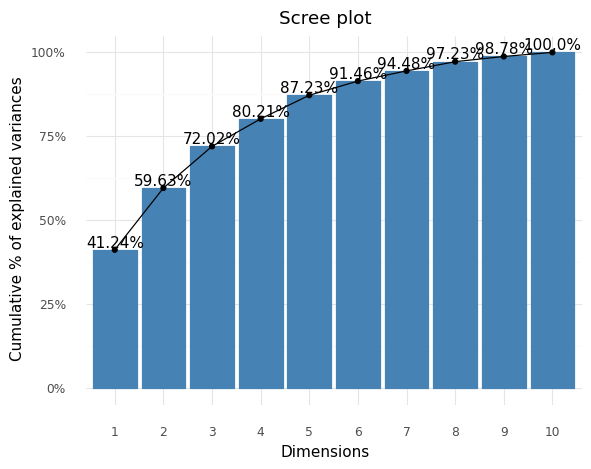

In [6]:
# Cumulative
p = fviz_screeplot(res_pca,choice="cumulative",add_labels=True)
print(p)

## Individuals Factor Map

### Colors bu RGB colors

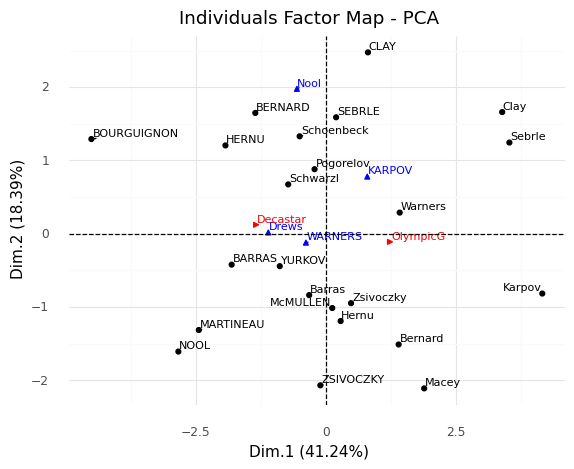

In [7]:
from scientisttools import fviz_pca_ind
p = fviz_pca_ind(res_pca,repel=True)
print(p)

### Color by cos2

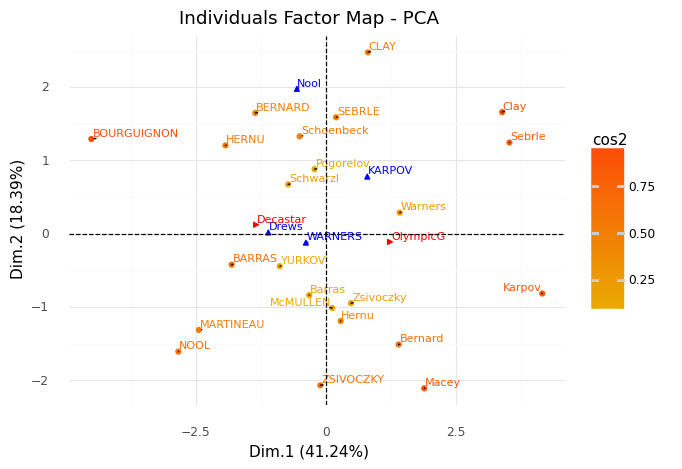

In [8]:
p = fviz_pca_ind(res_pca,color="cos2",repel=True)
print(p)

### Color by contrib

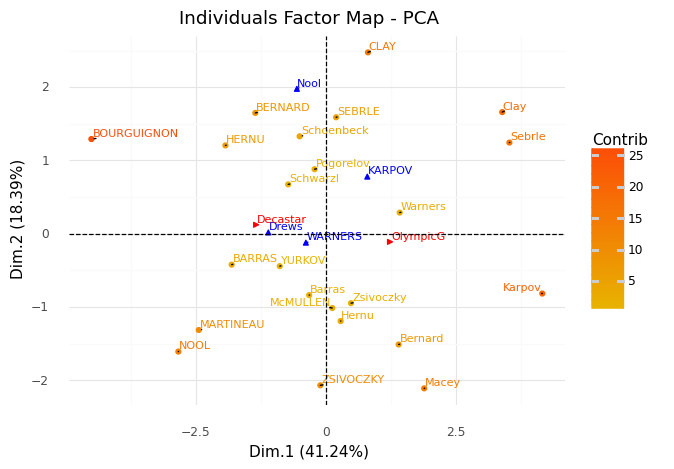

In [9]:
p = fviz_pca_ind(res_pca,color="contrib",repel=True)
print(p)

### Color by quantitative columns

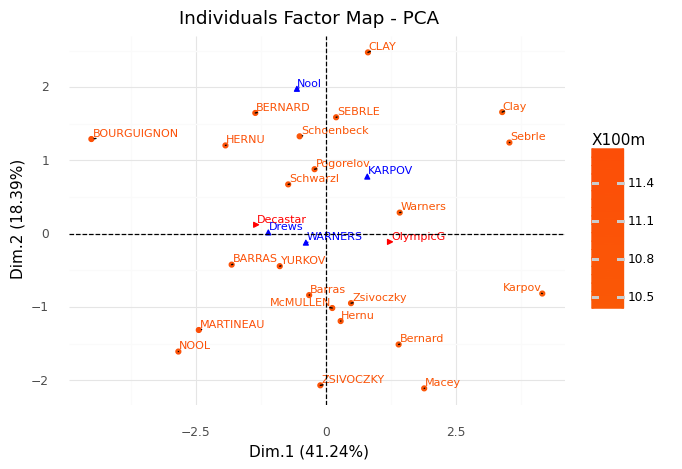

In [10]:
p = fviz_pca_ind(res_pca,color=X.columns.tolist()[0],repel=True)
print(p)

### Color by qualitatives columns

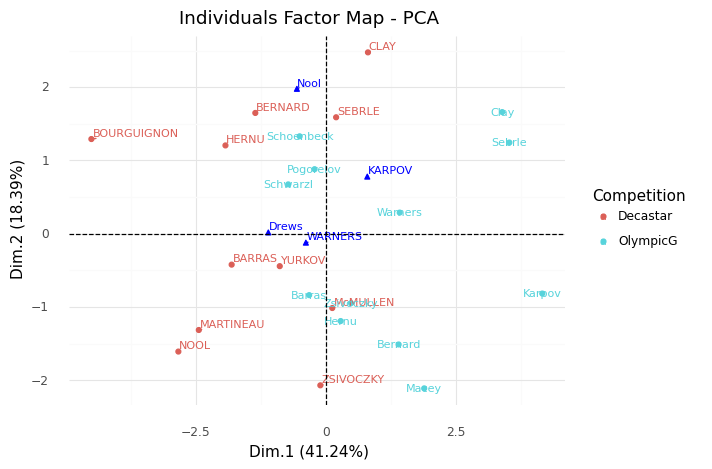

In [11]:
p = fviz_pca_ind(res_pca,habillage=X.columns.tolist()[-1],repel=True)
print(p)

### Color by numpy array

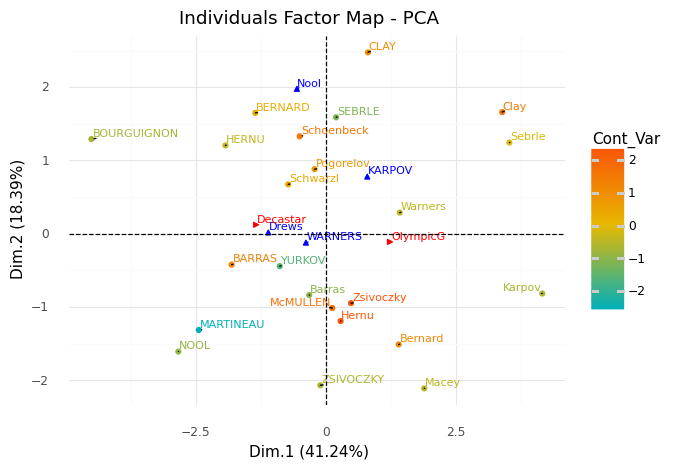

In [12]:
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_pca.call_["X"].shape[0])
p = fviz_pca_ind(res_pca,color=color_numpy,repel=True)
print(p)

### Color by kmeans clustering

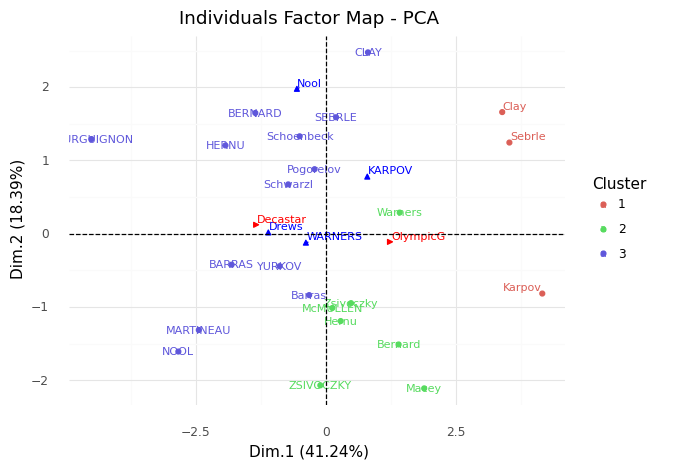

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_pca.ind_["coord"])
p = fviz_pca_ind(res_pca,color=kmeans,repel=True)
print(p)

### Set limits

#### Limit with cos2

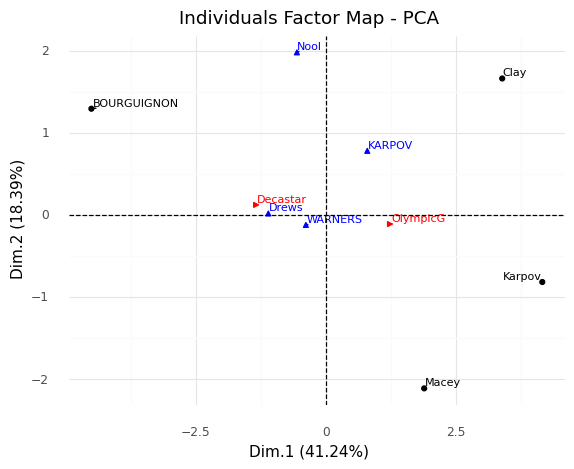

In [14]:
p = fviz_pca_ind(res_pca,lim_cos2=0.8,repel=True)
print(p)

#### Limit with contrib

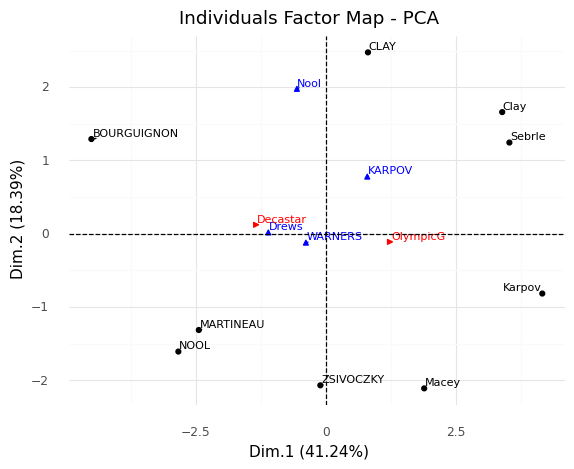

In [15]:
p = fviz_pca_ind(res_pca,lim_contrib=10,repel=True)
print(p)

## Variables Factor Map

### Color by RGB

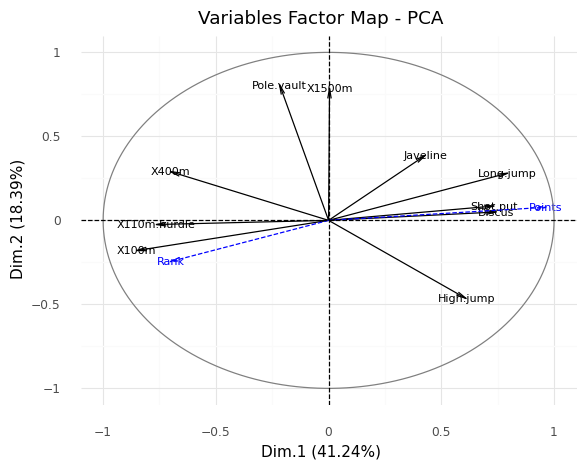

In [16]:
from scientisttools import fviz_pca_var
p = fviz_pca_var(res_pca)
print(p)

### Color by cos2

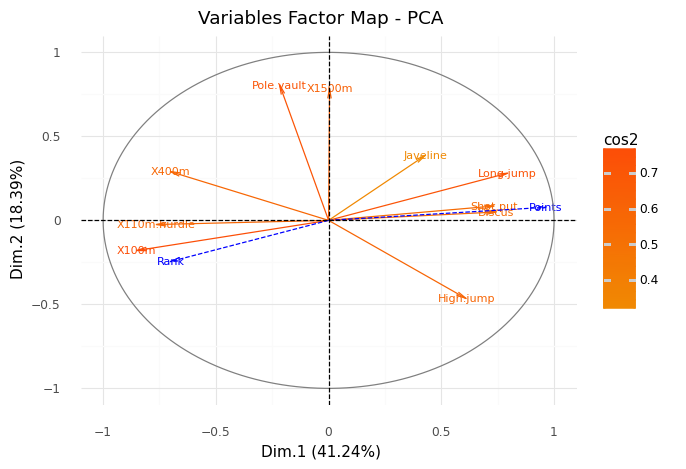

In [17]:
p = fviz_pca_var(res_pca,color="cos2")
print(p)

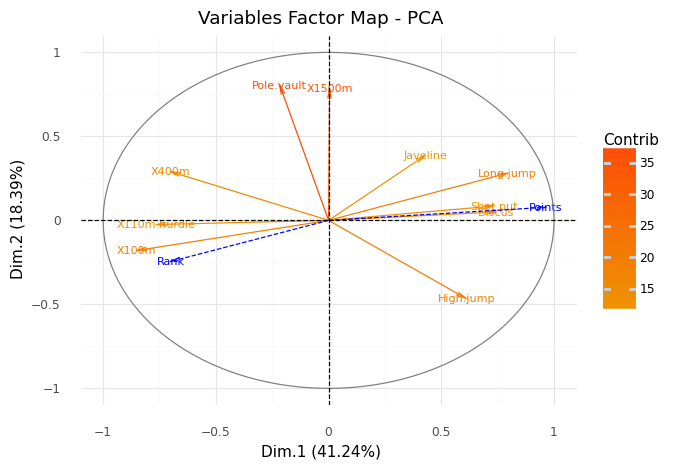

In [18]:
p = fviz_pca_var(res_pca,color="contrib")
print(p)

### Color by numpy array

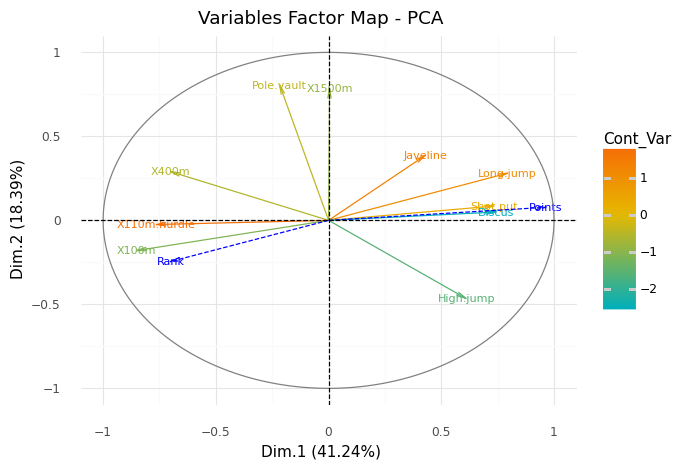

In [19]:
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_pca.call_["X"].shape[1])
p = fviz_pca_var(res_pca,color=color_numpy)
print(p)

### Color by kmeans clustering

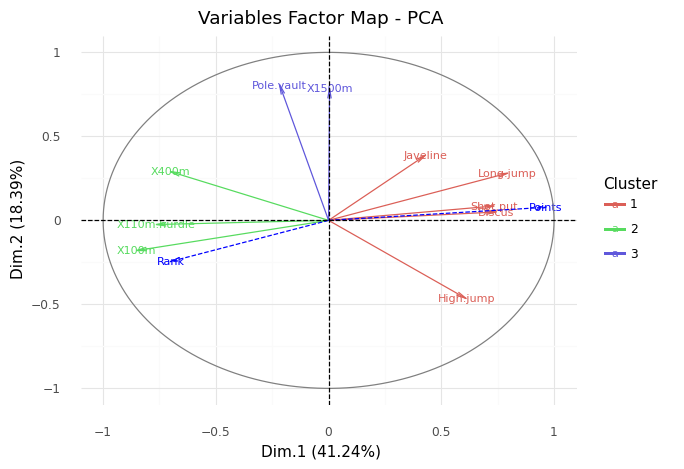

In [20]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_pca.var_["coord"])
p = fviz_pca_var(res_pca,color=kmeans)
print(p)

### Set limits

#### Limit with cos2

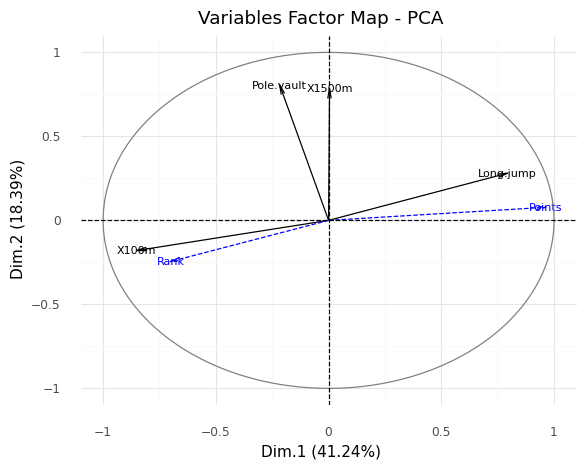

In [21]:
p = fviz_pca_var(res_pca,lim_cos2=0.6)
print(p)

#### Limit with contrib

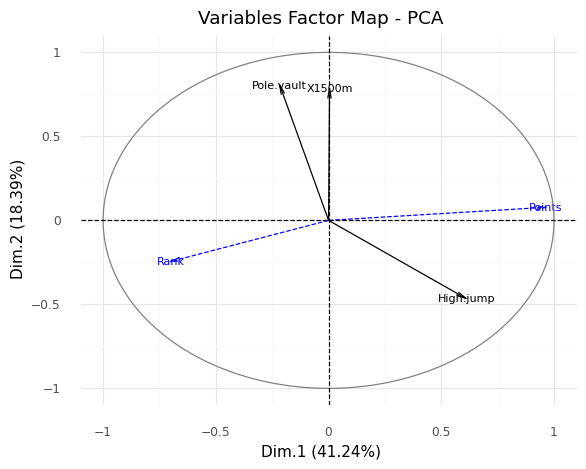

In [22]:
p = fviz_pca_var(res_pca,lim_contrib=20)
print(p)

##### Using fviz_corrcircle

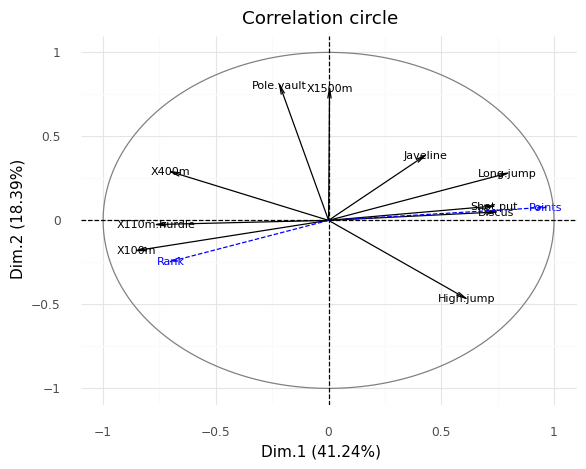

In [23]:
from scientisttools import fviz_corrcircle
p = fviz_corrcircle(res_pca)
print(p)

### plot contrib

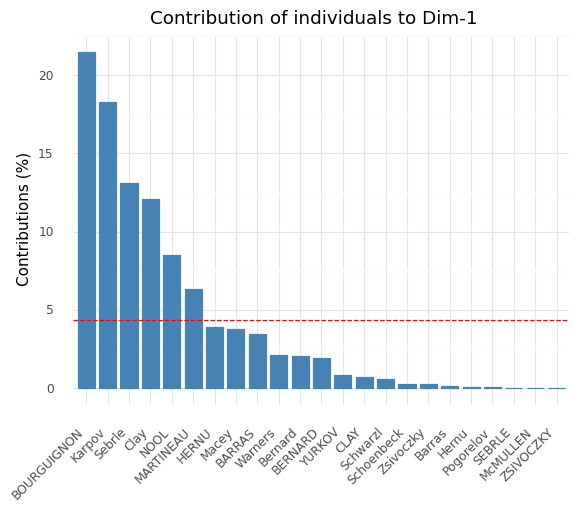

In [24]:
from scientisttools import fviz_contrib
p = fviz_contrib(res_pca,choice="ind")
print(p)

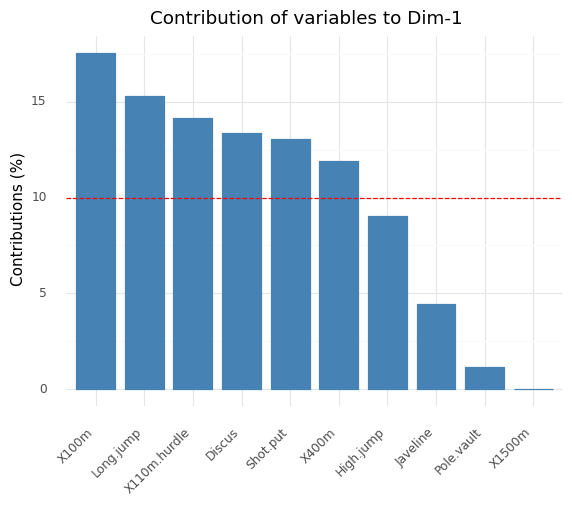

In [25]:
p = fviz_contrib(res_pca,choice="var")
print(p)

## plot cos2

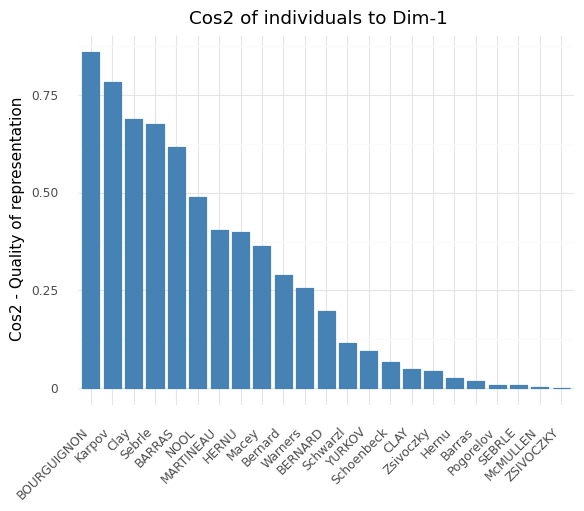

In [26]:
from scientisttools import fviz_cos2
p = fviz_cos2(res_pca)
print(p)

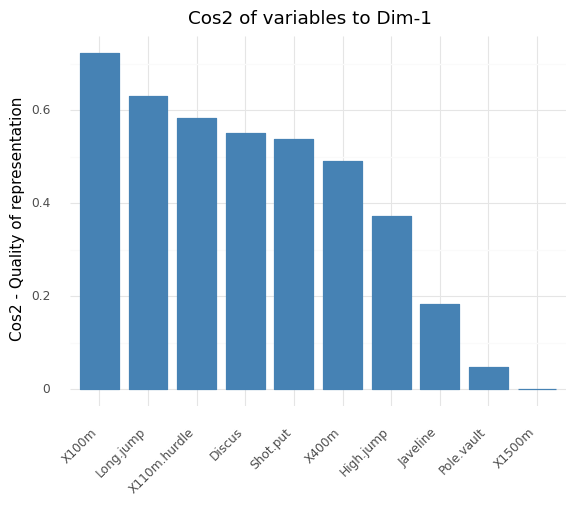

In [27]:
p = fviz_cos2(res_pca,choice="var")
print(p)

## Biplot

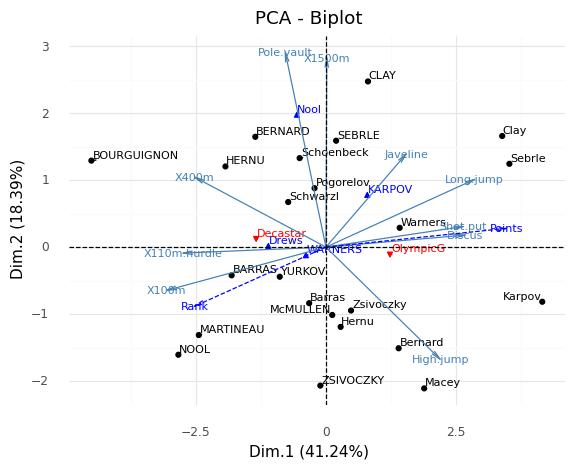

In [28]:
from scientisttools import fviz_pca_biplot
p = fviz_pca_biplot(res_pca)
print(p)